### Multiple Regression and “The Curse of Correlation”

In [28]:
!pip install plotly
# Multiple Regression and Collinearity
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [7]:
# We load the dataframe available in the course resources. 
df = pd.read_csv('../data/Advertising.csv', index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [26]:
# Adjust multiple model
X = df[['TV', 'Radio']]
y = df['Sales']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# p-values of the multiple regression coefficients
model.pvalues

const    4.565557e-19
TV       5.436980e-82
Radio    9.776972e-59
dtype: float64

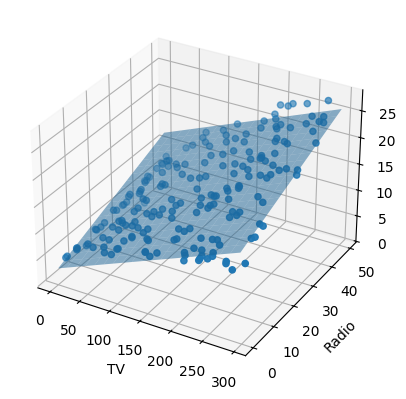

In [20]:
# Create mesh for the plane
tv = np.linspace(df.TV.min(), df.TV.max(), 20)
radio = np.linspace(df.Radio.min(), df.Radio.max(), 20)

tv_grid, radio_grid = np.meshgrid(tv, radio)

# plane predict 
X_grid = pd.DataFrame({
    'const': 1,
    'TV': tv_grid.ravel(),
    'Radio': radio_grid.ravel()
})

sales_pred = model.predict(X_grid)
sales_pred = sales_pred.values.reshape(tv_grid.shape)

# graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# real points
ax.scatter(df.TV, df.Radio, df.Sales)

# regression plane
ax.plot_surface(tv_grid, radio_grid, sales_pred, alpha=0.5)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

In [22]:
# only Newspaper
X1 = sm.add_constant(df[['Newspaper']])
m1 = sm.OLS(df['Sales'], X1).fit()

# Newspaper + Radio
X2 = sm.add_constant(df[['Newspaper', 'Radio']])
m2 = sm.OLS(df['Sales'], X2).fit()

# Compare p-values to illustrate collinearity
pd.DataFrame({
    'Only Newspaper': m1.pvalues,
    'Newspaper + Radio': m2.pvalues
})


,Newspaper,Newspaper + Radio
Newspaper,1.148196e-03,6.563393e-01
Radio,NaN,9.967077e-17
const,4.713507e-49,2.522846e-33


****Newspaper appears relevant when analyzed alone, but when Radio is included, its p-value increases to 0.66.
This indicates collinearity: Radio captures the explanatory variance that was previously attributed to Newspaper.****

In [27]:
df[['Newspaper', 'Radio']].corr()

,Newspaper,Radio
Newspaper,1.000000,0.354104
Radio,0.354104,1.000000
